In [1]:
#load required basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("TEST_FINAL.csv")

In [3]:
#Create a copy of train and test datasets
train_original=train.copy()
test_original=test.copy()

In [4]:
#Check the columns in train file
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [5]:
#Check datatypes in train file
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [6]:
#Check columns in test file
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [7]:
#Check datatypes in test file
test.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

In [8]:
#Check shape of the dataset
train.shape, test.shape

((188340, 10), (22265, 8))

In [9]:
#Change Date datatype to datetime format
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [10]:
#Add month and day of the week columns in train file for historical trends
train['Month']=train['Date'].dt.month
train['Dayofweek']=train['Date'].dt.dayofweek

In [11]:
#Add month and day of the week columns in test file for historical trends
test['Month']=test['Date'].dt.month
test['Dayofweek']=test['Date'].dt.dayofweek

In [12]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Month', 'Dayofweek'],
      dtype='object')

In [13]:
test.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Month', 'Dayofweek'],
      dtype='object')

In train and test file Date is not required anymore. So we can drop date. 
We can drop #Orders also since it is not present in test file. 
ID column in both files is unique for each line. So we can drop ID.

In [14]:
train=train.drop(['ID','#Order','Date'],axis=1)
test=test.drop(['ID','Date'],axis=1)

The target variable 'Sales' is numerical feature. So use probability density plots to check distribution

<AxesSubplot:>

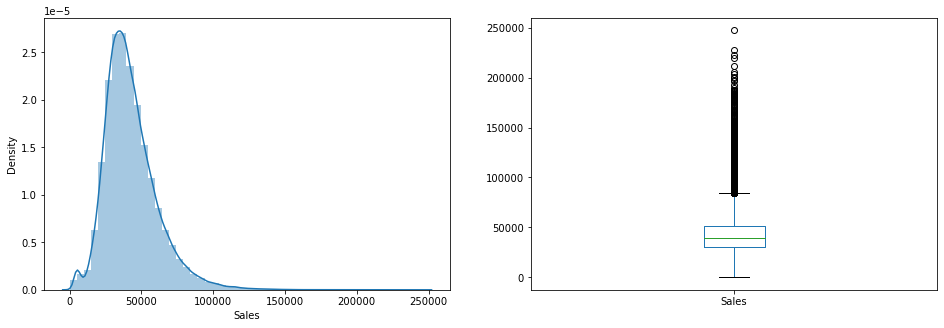

In [15]:
#Distribution of sales
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Sales']);
plt.subplot(122)
train['Sales'].plot.box(figsize=(16,5))

DATA VISUALISATION
Categorial Features: Holiday, Discount
Ordinal Features: Store_id, Store_Type, Location_Type, Region_Code, Month, Dayofweek

   Holiday         Sales
0        0  43897.288998
1        1  35451.878930
  Discount         Sales
0       No  37403.679678
1      Yes  49426.497620


<AxesSubplot:xlabel='Discount', ylabel='Sales'>

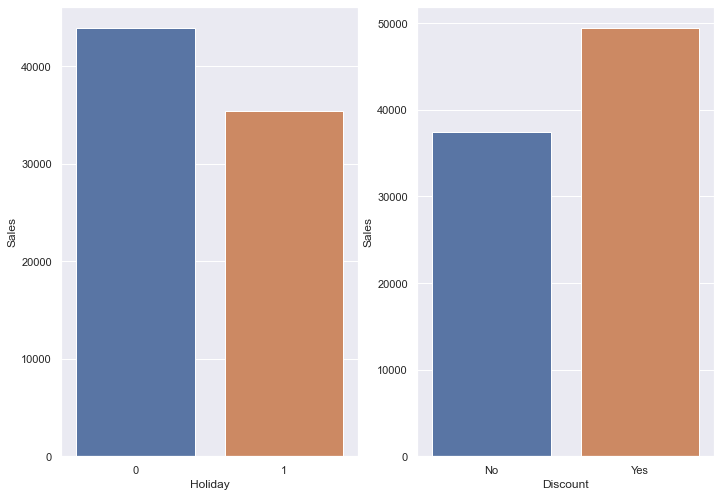

In [16]:
#Visualize Categorical Features

sns.set(rc={'figure.figsize':(11.7,8.27)})
  
# groupby holiday and check mean sales
df1 = train.groupby(['Holiday']).mean()['Sales']
df1 = df1.reset_index()
print(df1)

# groupby Discount and check mean sales
df2 = train.groupby(['Discount']).mean()['Sales']
df2 = df2.reset_index()
print(df2)

plt.figure(1)
plt.subplot(121)
sns.barplot(x="Holiday",y="Sales",data=df1);
plt.subplot(122)
sns.barplot(x="Discount",y="Sales",data=df2)

Average sale is higher on a Non-Holiday than a holiday which is unexpected. Coming to discount, sales are higher when the store is offering a discount.

     Store_id         Sales
0           1  34698.442326
1           2  46333.863198
2           3  62479.448953
3           4  38482.236744
4           5  43452.710872
..        ...           ...
360       361  33521.863779
361       362  34065.920523
362       363  41357.393779
363       364  30277.224651
364       365  30750.429012

[365 rows x 2 columns]
  Store_Type         Sales
0         S1  37676.511694
1         S2  27530.828222
2         S3  47063.068209
3         S4  59945.685926
  Location_Type         Sales
0            L1  41453.597889
1            L2  59231.480373
2            L3  33072.257756
3            L4  29067.414313
4            L5  25187.787261
  Region_Code         Sales
0          R1  46765.488405
1          R2  40054.847344
2          R3  42144.517063
3          R4  39743.434249
    Month         Sales
0       1  44979.147732
1       2  40424.350645
2       3  40979.577286
3       4  40773.681352
4       5  48115.830407
5       6  44705.726389
6       7  46585.

<AxesSubplot:xlabel='Dayofweek', ylabel='Sales'>

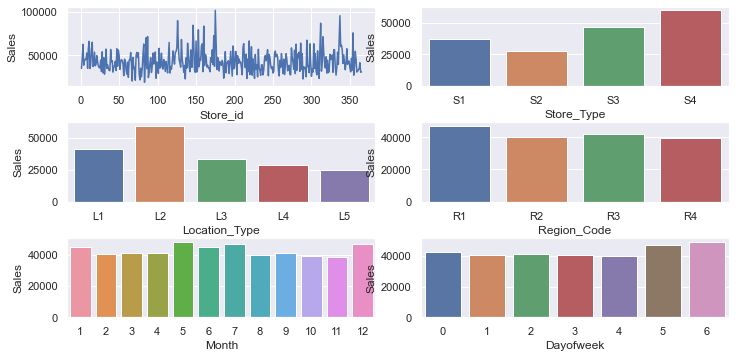

In [17]:
#Visualize Ordinal Features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,5))
fig.tight_layout()
  
# groupby Store_id and check mean sales
df1 = train.groupby(['Store_id']).mean()['Sales']
df1 = df1.reset_index()
print(df1)

# groupby Store_Type and check mean sales
df2 = train.groupby(['Store_Type']).mean()['Sales']
df2 = df2.reset_index()
print(df2)

# groupby Location_Type and check mean sales
df3 = train.groupby(['Location_Type']).mean()['Sales']
df3 = df3.reset_index()
print(df3)

# groupby Region_Code and check mean sales
df4 = train.groupby(['Region_Code']).mean()['Sales']
df4 = df4.reset_index()
print(df4)

# groupby Month and check mean sales
df5 = train.groupby(['Month']).mean()['Sales']
df5 = df5.reset_index()
print(df5)

# groupby Dayofweek and check mean sales
df6 = train.groupby(['Dayofweek']).mean()['Sales']
df6 = df6.reset_index()
print(df6)


plt.figure(1)
plt.subplot(321)
sns.lineplot(x="Store_id",y="Sales",data=df1);
plt.subplot(322)
sns.barplot(x="Store_Type",y="Sales",data=df2);
plt.subplot(323)
sns.barplot(x="Location_Type",y="Sales",data=df3);
plt.subplot(324)
sns.barplot(x="Region_Code",y="Sales",data=df4);
plt.subplot(325)
sns.barplot(x="Month",y="Sales",data=df5);
plt.subplot(326)
sns.barplot(x="Dayofweek",y="Sales",data=df6)

#Above factors show clear indication on dependencies of each factor on number of sales

In [18]:
#For converting to numerical, we can change Yes or No in discount to 1 and 0 respectively
train['Discount'].replace('No',0,inplace=True)
train['Discount'].replace('Yes',1,inplace=True)
test['Discount'].replace('No',0,inplace=True)
test['Discount'].replace('Yes',1,inplace=True)

Check correlation between the variables using heatmap

<AxesSubplot:>

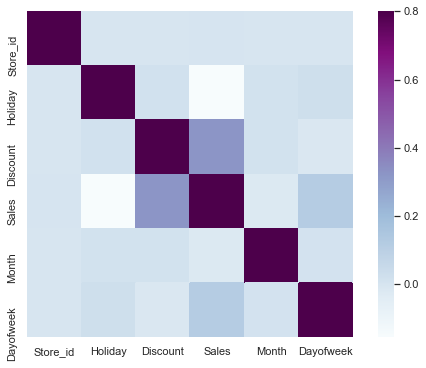

In [19]:
matrix=train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square='True', cmap="BuPu")

Missing value imputation and outliner treatment

In [20]:
#check for missing values in train file
train.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Sales            0
Month            0
Dayofweek        0
dtype: int64

In [21]:
#check for missing values in test file
test.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
Month            0
Dayofweek        0
dtype: int64

Now, treat the outliners in Sales using log. Then check for any infinite or missing values

In [22]:
#Use log function on Sales column
train['log_sales'] = np.log(train['Sales'])

In [23]:
#Check for lowest value
train['log_sales'].min()

-inf

In [24]:
#Check for highest value
train['log_sales'].max()

12.41801368233639

In [25]:
#Check for null values
train['log_sales'].isnull().sum()

0

In [26]:
#There in -inf in 'log_sales'. Impute the negative infinity value with zero
train.replace(to_replace = -np.inf, value =0,inplace=True)

In [27]:
#Now drop sales from train file
train=train.drop('Sales',1)

Since sklearn requires target variable in seperate dataset, create a new dataset y with target variable

In [28]:
#Drop target variable and create new dataset y
X=train.drop('log_sales',1)
y=train.log_sales

use pd.get_dummies to convert categorial variables into dummy variables i.e series of 0 and 1

In [29]:
#Convert into dummy variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Modelling

In [30]:
#Train model using LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=7)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train , y_train)
pred = reg.predict(X_val)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val,pred))
print(rmse)

0.3342939910338557


In [31]:
#Train model using Linear_model.Ridge

from sklearn.model_selection import GridSearchCV
model = linear_model.Ridge(random_state = 1)
param_grid = {"alpha" : [0.01 , 0.2 , 0.250 , 0.3] }
grid = GridSearchCV( model , param_grid , cv = 7 , scoring = "neg_mean_squared_error")
grid.fit(X,y)

grid.best_score_rmse = np.sqrt(-grid.best_score_)
print(rmse)

0.3342939910338557


In [32]:
#set best parameters 
grid.best_params_

{'alpha': 0.3}

In [33]:
#Train model using Linear_model.Lasso

model = linear_model.Lasso(random_state = 1)
param_grid = {"alpha" : [0.001 , 0.0001] ,"max_iter" : [600 , 700]}
grid = GridSearchCV( model , param_grid , cv = 7 , scoring = "neg_mean_squared_error")
grid.fit(X,y)

rmse = np.sqrt(-grid.best_score_)
print(rmse)

0.33391753987468276


In [34]:
#Set best parameters
grid.best_params_

{'alpha': 0.0001, 'max_iter': 600}

In [35]:
#Train model using DecisionTreeRegressor

from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train , y_train)
pred = clf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val,pred))
print(rmse)

0.34803601783455546


In [36]:
#Train model using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=15)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val,rf_pred))
rmse_rf

0.28126866253896565

In [37]:
#Train model using XGBRegressor

from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=15,n_jobs=4,n_estimators=120,subsample=0.7)
xgb.fit(X_train,y_train)
xg_pred = xgb.predict(X_val)

rmse_xgb = np.sqrt(mean_squared_error(y_val,xg_pred))
rmse_xgb

0.3404683471472117

The best score was from RandomForestRegressor. So deploy RandomForestRegressor for final prediction.

In [38]:
#Deploy model on test file
pred_test = rf.predict(test)

In [39]:
#Read Sample data file
submission=pd.read_csv("SAMPLE.csv")

In [40]:
#Set columns
submission['Sales']=pred_test
submission['ID']=test_original['ID']

The sales column has been converted to logarthimic data. Use np.exp function to revert back the data

In [41]:
#Use np.exp on logarthmic data
submission['Sales']=np.exp(submission['Sales'])

In [42]:
#Export final dataset as Final_Submission.csv
pd.DataFrame(submission,columns=['ID','Sales']).to_csv('Final_Submission.csv')